In [1]:
# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste de estilo dos gráficos (talvez não relevante)
#sns.set(style="whitegrid")
#plt.rcParams["figure.figsize"] = (10, 6)

dataset_tesouro = 'tesouro.csv'
# === 1. Carregar o dataset principal ===
df_amostra = pd.read_csv(
    dataset_tesouro,
    sep=';',
    encoding='latin1'
)



In [3]:
# Visualizar primeiras colunas e tipos (para confirmar nomes)
print("🧾 Colunas disponíveis:")
print(df_amostra.columns)


numero_de_linhas = df_amostra.shape[0]
numero_de_colunas = df_amostra.shape[1]

print(f"Número de linhas: {numero_de_linhas}")
print(f"Número de colunas: {numero_de_colunas}")

🧾 Colunas disponíveis:
Index(['Codigo do Investidor', 'Data de Adesao', 'Estado Civil', 'Genero',
       'Profissao', 'Idade', 'UF do Investidor', 'Cidade do Investidor',
       'Pais do Investidor', 'Situacao da Conta', 'Operou 12 Meses'],
      dtype='object')
Número de linhas: 60398724
Número de colunas: 11


In [2]:
# === 2. Filtrar apenas investidoras mulheres ===
df_fem = df_amostra[df_amostra['Genero'].str.upper() == 'F'].copy()

In [25]:
# === 3. Estatísticas descritivas ===
pd.set_option('display.float_format', '{:.2f}'.format)


# Estatísticas descritivas da idade
# Remove idades inválidas: menores ou iguais a 10 e maiores que 110
df_fem = df_fem[(df_fem['Idade'] >= 11) & (df_fem['Idade'] <= 110)]

print("\n📊 Estatísticas da idade das investidoras:")
print(df_fem['Idade'].describe())

# Estados com mais investidoras
top_estados = df_fem['UF do Investidor'].value_counts()
print("\n🌍 Top estados por quantidade de investidoras:")
print(top_estados.head(10))

# Cidades com mais investidoras
top_cidades = df_fem['Cidade do Investidor'].value_counts()
print("\n🏙️ Top cidades por quantidade de investidoras:")
print(top_cidades.head(10))

# Situação da conta (ativa/inativa/etc.)
print("\n📌 Situação da conta das investidoras:")
print(df_fem['Situacao da Conta'].value_counts())

# Operou nos últimos 12 meses?
print("\n🕒 Operou nos últimos 12 meses (investidoras):")
print(df_fem['Operou 12 Meses'].value_counts())


📊 Estatísticas da idade das investidoras:
count   15287661.00
mean          38.69
std           13.25
min           11.00
25%           29.00
50%           36.00
75%           46.00
max          110.00
Name: Idade, dtype: float64

🌍 Top estados por quantidade de investidoras:
UF do Investidor
SP    5092110
RJ    1620769
MG    1517918
PR     818078
BA     690321
RS     687943
SC     612828
DF     571275
GO     477554
PE     455349
Name: count, dtype: int64

🏙️ Top cidades por quantidade de investidoras:
Cidade do Investidor
SAO PAULO         1952951
RIO DE JANEIRO     843809
BRASILIA           570912
BELO HORIZONTE     427242
CURITIBA           288085
SALVADOR           272986
FORTALEZA          234733
PORTO ALEGRE       190809
GOIANIA            186468
MANAUS             171806
Name: count, dtype: int64

📌 Situação da conta das investidoras:
Situacao da Conta
A    10078964
D     5208697
Name: count, dtype: int64

🕒 Operou nos últimos 12 meses (investidoras):
Operou 12 Meses
N    14346

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7816\2660365331.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, palette='rocket')


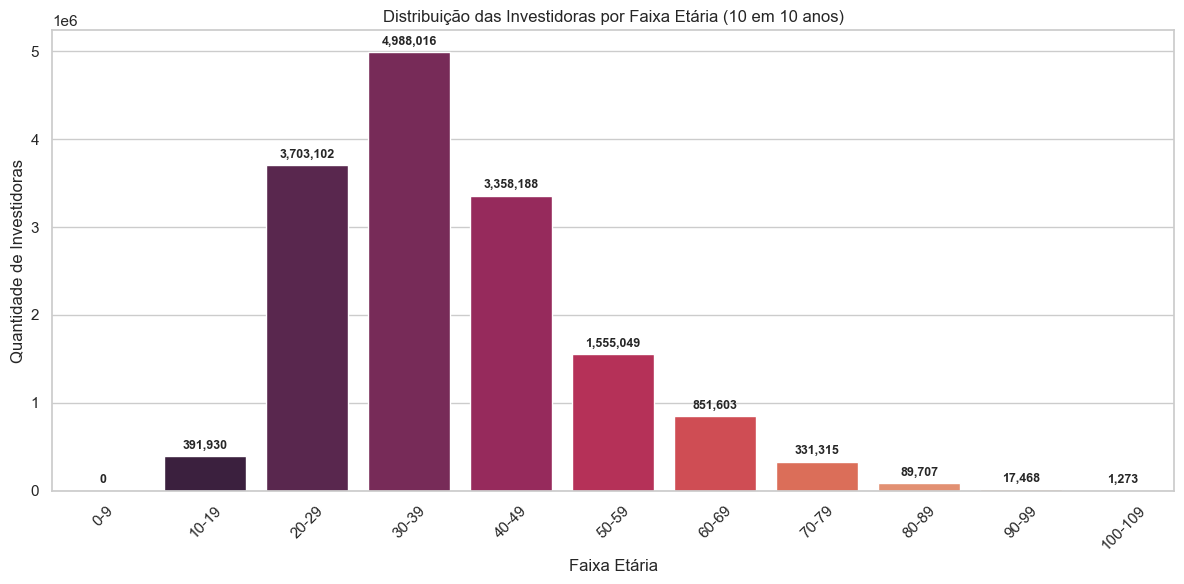

In [39]:
# =============================================================== Gráficos =======================================================================================================

# Criação de faixas etárias (de 10 em 10 anos)
bins = list(range(0, 120, 10))  # Faixas de 0 a 130 anos
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df_fem['Faixa Etária'] = pd.cut(df_fem['Idade'], bins=bins, labels=labels, right=False)

# Contando quantidade de investidoras por faixa etária
faixa_etaria_counts = df_fem['Faixa Etária'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=faixa_etaria_counts.index, y=faixa_etaria_counts.values, palette='rocket')

# Adicionando os valores no topo de cada barra
for i, v in enumerate(faixa_etaria_counts.values):
    ax.text(i, v + max(faixa_etaria_counts.values) * 0.01, f'{int(v):,}', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Distribuição das Investidoras por Faixa Etária (10 em 10 anos)')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Investidoras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7816\2649857805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_estados.values, y=top_estados.index, palette='pastel')


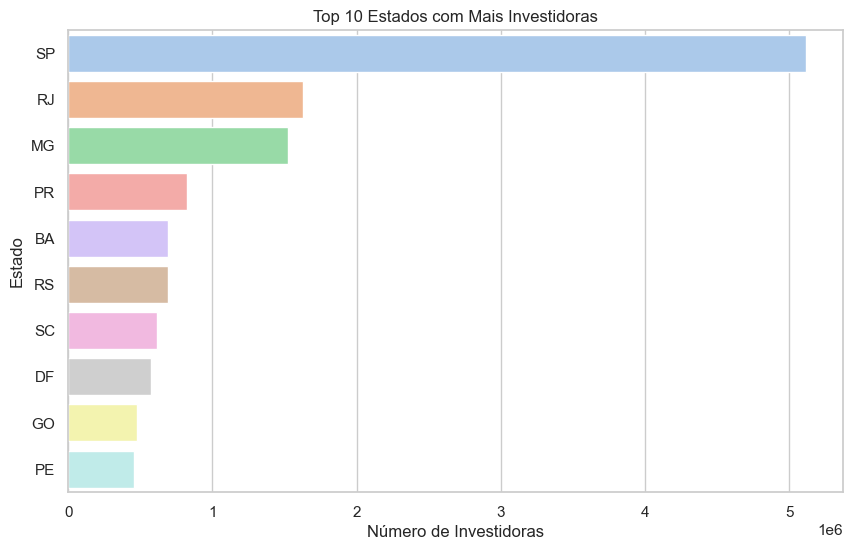

In [12]:
# Top 10 estados
top_estados = top_estados.head(10)
sns.barplot(x=top_estados.values, y=top_estados.index, palette='pastel')
plt.title('Top 10 Estados com Mais Investidoras')
plt.xlabel('Número de Investidoras')
plt.ylabel('Estado')
plt.show()



C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7816\1507032168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cidades.values, y=top_cidades.index, palette='mako')


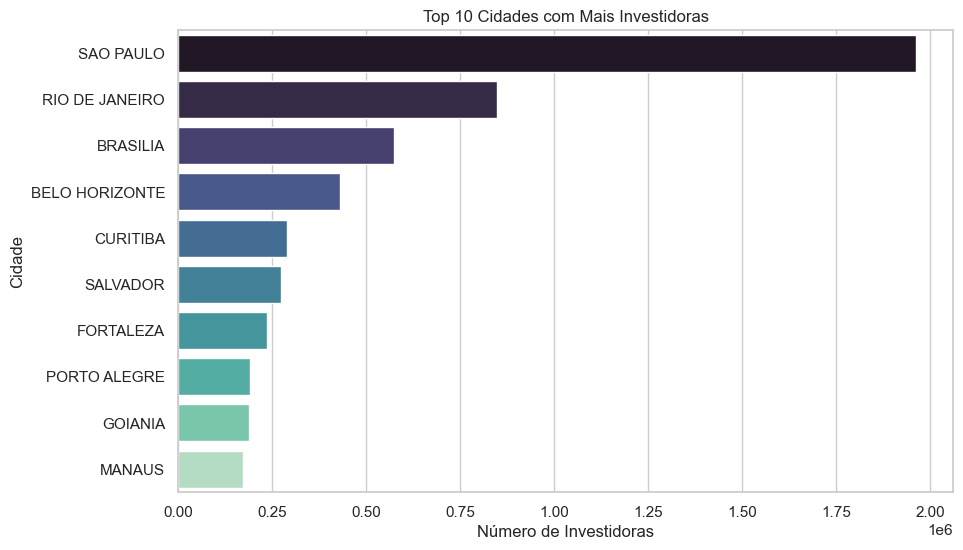

In [13]:
# Top 10 cidades
top_cidades = top_cidades.head(10)
sns.barplot(x=top_cidades.values, y=top_cidades.index, palette='mako')
plt.title('Top 10 Cidades com Mais Investidoras')
plt.xlabel('Número de Investidoras')
plt.ylabel('Cidade')
plt.show()



C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7816\3712012531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fem, x='Situacao da Conta', palette='Set2')


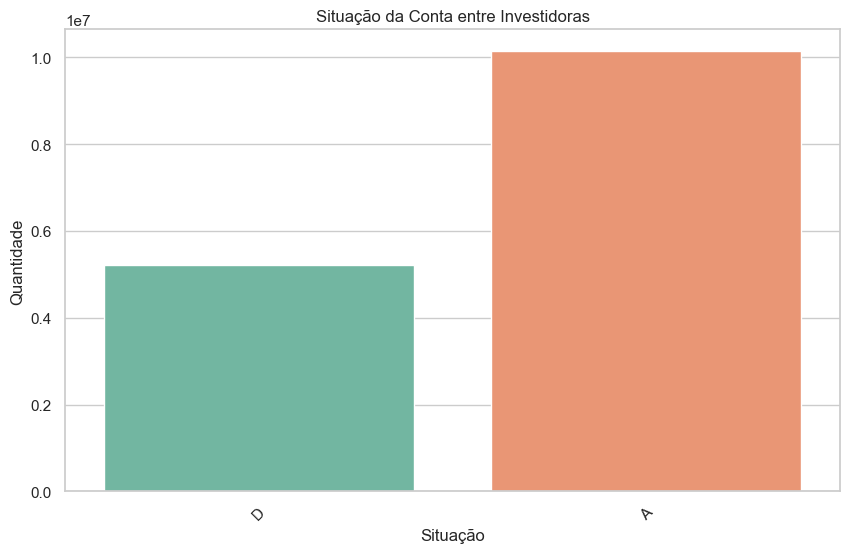

In [14]:
# Distribuição da Situação da Conta
sns.countplot(data=df_fem, x='Situacao da Conta', palette='Set2')
plt.title('Situação da Conta entre Investidoras')
plt.xlabel('Situação')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()


In [1]:

# Distribuição da coluna 'Operou 12 Meses'
sns.countplot(data=df_fem, x='Operou 12 Meses', palette='Set1')
plt.title('Operação nos Últimos 12 Meses')
plt.xlabel('Operou?')
plt.ylabel('Quantidade')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
#Verificação de nulos
print(df_fem.isnull().sum())

Codigo do Investidor    0
Data de Adesao          0
Estado Civil            0
Genero                  0
Profissao               0
Idade                   0
UF do Investidor        0
Cidade do Investidor    3
Pais do Investidor      0
Situacao da Conta       0
Operou 12 Meses         0
dtype: int64


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7816\3368766459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=media_idade_estado_civil.values, y=media_idade_estado_civil.index, palette='coolwarm')


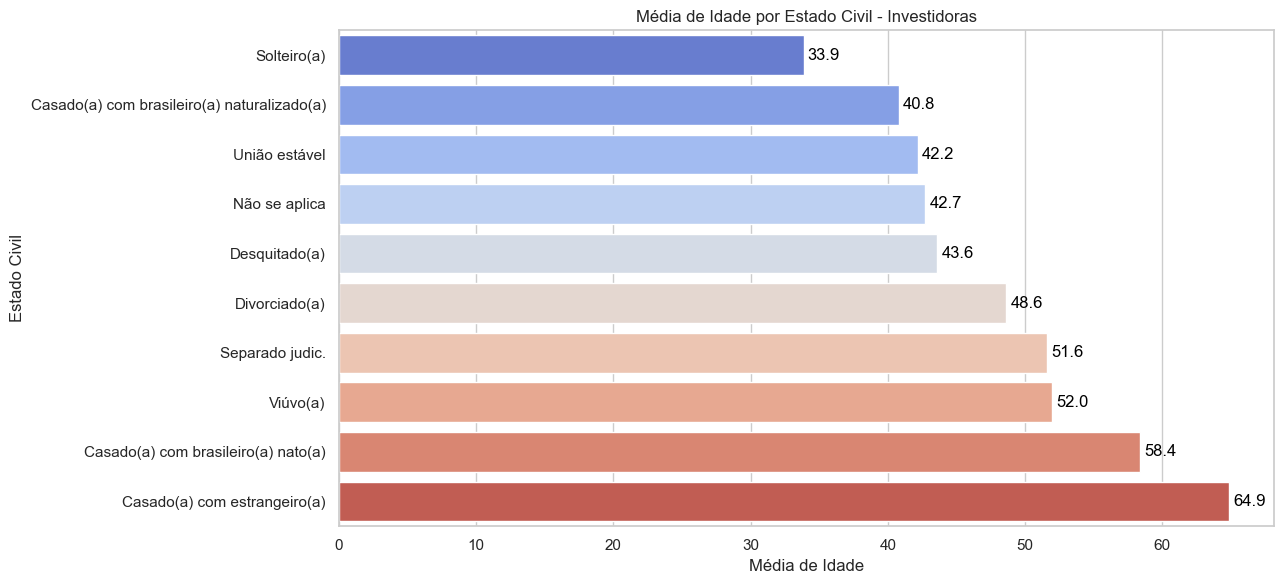

In [35]:
# Verificar relação entre idade e estado civil (boxplot)
# Média de idade por estado civil
media_idade_estado_civil = df_fem.groupby('Estado Civil')['Idade'].mean().sort_values()

plt.figure(figsize=(13, 6))
ax = sns.barplot(x=media_idade_estado_civil.values, y=media_idade_estado_civil.index, palette='coolwarm')

# Adiciona os valores no topo de cada barra
for i, v in enumerate(media_idade_estado_civil.values):
    ax.text(v + 0.3, i, f"{v:.1f}", color='black', va='center')

plt.title('Média de Idade por Estado Civil - Investidoras')
plt.xlabel('Média de Idade')
plt.ylabel('Estado Civil')
plt.tight_layout()
plt.show()



C:\Users\Gabriel\AppData\Local\Temp\ipykernel_9872\3324236581.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=investimento_12m.index, y=investimento_12m.values, palette="viridis")


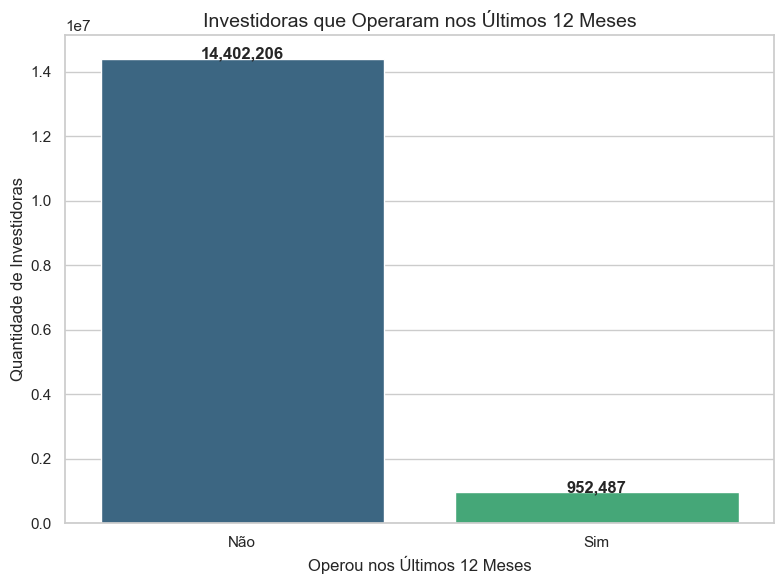

In [ ]:
###Investimentos realizados nos últimos 12 meses (SIM X NAO)

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)

# Contagem das investidoras por operação nos últimos 12 meses
investimento_12m = df_fem['Operou 12 Meses'].value_counts().rename(index={'S': 'Sim', 'N': 'Não'})

# Gráfico de barras
ax = sns.barplot(x=investimento_12m.index, y=investimento_12m.values, palette="viridis")

# Adiciona os valores no topo de cada barra
for i, v in enumerate(investimento_12m.values):
    ax.text(i, v + 10000, f'{v:,}', ha='center', fontweight='bold')

# Títulos e rótulos
plt.title('Investidoras que Operaram nos Últimos 12 Meses', fontsize=14)
plt.xlabel('Operou nos Últimos 12 Meses')
plt.ylabel('Quantidade de Investidoras')
plt.tight_layout()
plt.show()